## LIve Alarm Association Mining

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

In [2]:
alarm = pd.read_csv('/home/bhanuchander/help/out.csv')
print alarm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967585 entries, 0 to 1967584
Data columns (total 30 columns):
ID                        int64
CREATIONTIME              int64
TIME                      int64
OPERATIONTYPE             object
ALARMID                   int64
EVENTID                   int64
MOID                      int64
OBJECTTYPE                object
ALARMIDENTIFIER           object
LAYERRATE                 object
TYPE                      object
FUNCTYPE                  object
PROBABLECAUSE             object
PROBABLECAUSEQUALIFIER    object
GRANULARITY               float64
PMPARAMNAME               float64
PMLOCATION                float64
THRESHOLDTYPE             float64
STANDARDNAME              object
NATIVEPROBABLECAUSE       object
NATIVESEVERITY            object
SEVERITY                  object
STATE                     object
VENDOR                    object
EMSNAME                   object
EMSTIME                   float64
SOURCE                    obje

In [3]:
alarm['TIME'] = pd.to_datetime(alarm['TIME'], unit='ms')

alarm['DAY'] = alarm['TIME'].dt.weekday_name

alarm['HOUR'] = alarm['TIME'].dt.hour

# alarm.ix[alarm['HOUR'] <= 13, 'HOUR'] = 'FORE_NOON'
# alarm.ix[alarm['HOUR'] > 13, 'HOUR'] = 'AFTER_NOON'
alarm['HOUR'][(alarm['HOUR'] >= 4) & (alarm['HOUR'] >= 18)]= 'NIGHT'
alarm['HOUR'][(alarm['HOUR'] >= 13) & (alarm['HOUR'] < 18)]= 'AN'
alarm['HOUR'][alarm['HOUR'] < 13 ]= 'FN'

print alarm['HOUR'].value_counts()

names = ['OBJECTTYPE', 'PROBABLECAUSE', 'SEVERITY', 'DAY', 'HOUR']

alarm = alarm[names]

print 'Observations : ', alarm.shape[0]

print 'Columns      : ', alarm.shape[1]

print alarm.head()

NIGHT    936974
FN       818542
AN       212069
Name: HOUR, dtype: int64
Observations :  1967585
Columns      :  5
  OBJECTTYPE                                  PROBABLECAUSE  SEVERITY     DAY  \
0        PTP  causing error codes or packets over the link.  CRITICAL  Sunday   
1        PTP                                  bufferOverrun     MAJOR  Sunday   
2        PTP                                  bufferOverrun     MAJOR  Sunday   
3        PTP                            inoperableEquipment  CRITICAL  Sunday   
4        PTP                            inoperableEquipment  CRITICAL  Sunday   

    HOUR  
0  NIGHT  
1  NIGHT  
2  NIGHT  
3  NIGHT  
4  NIGHT  


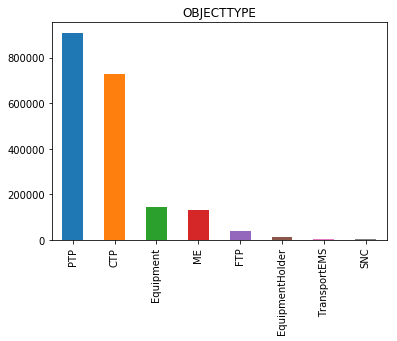

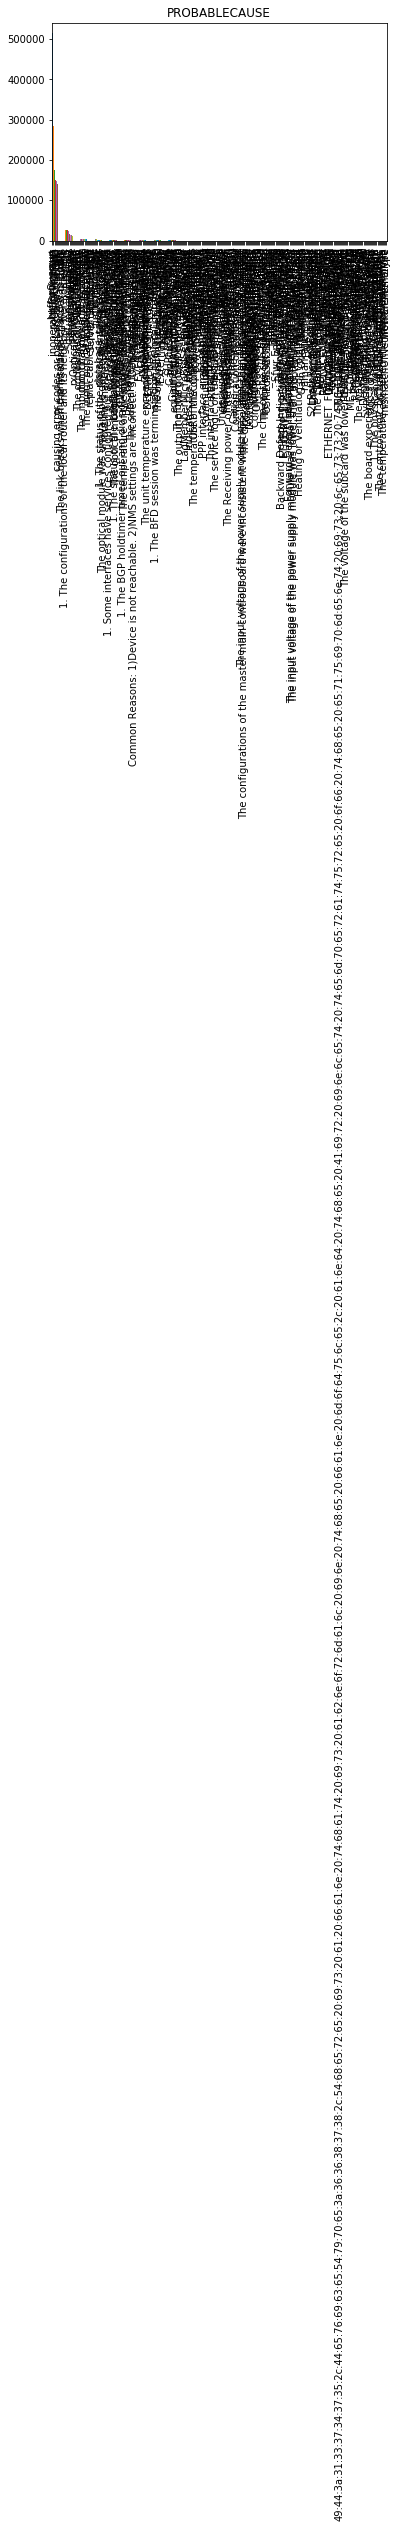

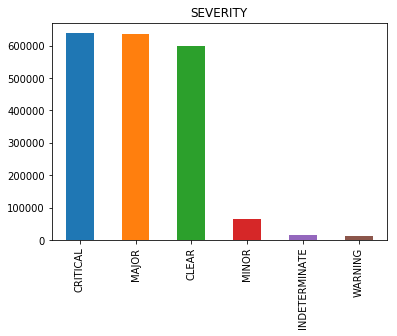

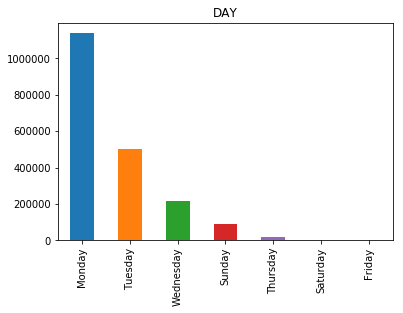

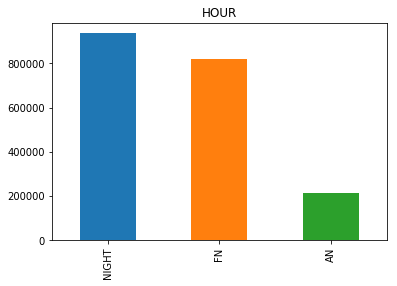

In [4]:
for n in names:
    alarm[n].value_counts().plot(kind="bar")
    plt.title(n)
    plt.show()

## Implementing the Association Rule Mining

In [5]:
dataset = []
for i in range(0, alarm.shape[0]-1):
    dataset.append([str(alarm.values[i,j]) for j in range(0, alarm.shape[1])])
# dataset = alarm.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)

output = apriori(df, min_support=0.1, use_colnames=oht.columns_)

output.sort_values(by=['support'])

print output

     support                              itemsets
0   0.107781                                  (AN)
1   0.303586                               (CLEAR)
2   0.324602                            (CRITICAL)
3   0.369189                                 (CTP)
4   0.416014                                  (FN)
5   0.322810                               (MAJOR)
6   0.578531                              (Monday)
7   0.476205                               (NIGHT)
8   0.462234                                 (PTP)
9   0.256031                             (Tuesday)
10  0.109472                           (Wednesday)
11  0.261264                       (bufferOverrun)
12  0.143894                 (inoperableEquipment)
13  0.129775                          (CLEAR, CTP)
14  0.114669                           (CLEAR, FN)
15  0.192932                       (CLEAR, Monday)
16  0.163319                        (CLEAR, NIGHT)
17  0.105249                          (CLEAR, PTP)
18  0.177093                   

In [6]:
config = [
    ('antecedent support', 0.5),
    ('support', 0.3),
    ('confidence', 0.9),
    ('conviction', 10)
]

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  antecedent support  Value :  0.5
----------------------------------------------
   antecedents      consequents  antecedent support
0     (Monday)          (MAJOR)            0.578531
1     (Monday)            (CTP)            0.578531
2     (Monday)     (NIGHT, PTP)            0.578531
3     (Monday)          (CLEAR)            0.578531
4     (Monday)   (CLEAR, NIGHT)            0.578531
5     (Monday)  (CRITICAL, PTP)            0.578531
6     (Monday)     (MAJOR, CTP)            0.578531
7     (Monday)   (MAJOR, NIGHT)            0.578531
8     (Monday)       (CRITICAL)            0.578531
9     (Monday)          (NIGHT)            0.578531
10    (Monday)             (FN)            0.578531
11    (Monday)            (PTP)            0.578531
12    (Monday)     (CTP, NIGHT)            0.578531


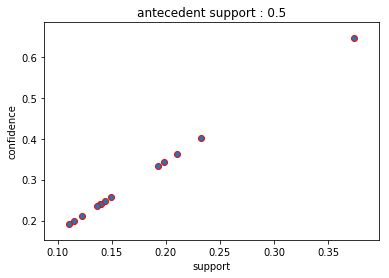

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  support  Value :  0.3
----------------------------------------------
  antecedents consequents   support
0    (Monday)     (NIGHT)  0.373871
1     (NIGHT)    (Monday)  0.373871


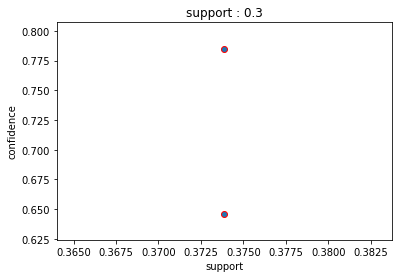

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  confidence  Value :  0.9
----------------------------------------------
                        antecedents      consequents  confidence
0             (inoperableEquipment)            (PTP)    0.989852
1                   (bufferOverrun)            (CTP)    0.961230
2                    (CRITICAL, FN)            (PTP)    0.955408
3   (CRITICAL, inoperableEquipment)            (PTP)    1.000000
4        (inoperableEquipment, PTP)       (CRITICAL)    0.976967
5             (inoperableEquipment)  (CRITICAL, PTP)    0.967053
6               (Tuesday, CRITICAL)            (PTP)    0.961231
7               (bufferOverrun, FN)            (CTP)    0.959317
8                         (CTP, FN)  (bufferOverrun)    0.970536
9                       (Wednesday)             (FN)    0.999740
10           (MAJOR, 

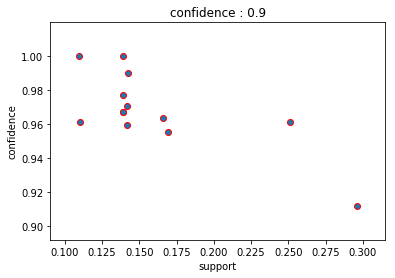

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
----------------------------------------------
For the Metric :  conviction  Value :  10
----------------------------------------------
                        antecedents      consequents   conviction
0             (inoperableEquipment)            (PTP)    52.994713
1                   (bufferOverrun)            (CTP)    16.270624
2                    (CRITICAL, FN)            (PTP)    12.059579
3   (CRITICAL, inoperableEquipment)            (PTP)          inf
4        (inoperableEquipment, PTP)       (CRITICAL)    29.323066
5             (inoperableEquipment)  (CRITICAL, PTP)    21.370502
6               (Tuesday, CRITICAL)            (PTP)    13.871167
7               (bufferOverrun, FN)            (CTP)    15.505632
8                         (CTP, FN)  (bufferOverrun)    25.072881
9                       (Wednesday)             (FN)  2246.209252
10         

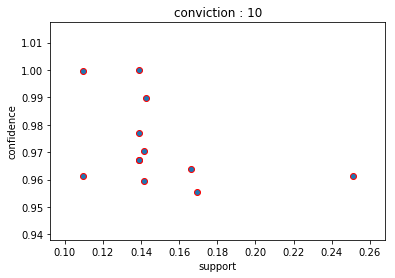

In [7]:
for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print '----------------------------------------------'
    print 'For the Metric : ', metric_type, ' Value : ', th
    print '----------------------------------------------'
    print rules[['antecedents', 'consequents', metric_type]]

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()

## Intersting Informations From the Live alarm:
---


#### Information 1:
---

```
(Monday)     (NIGHT)  0.373871

```

Here, **37.38 %** Alarms are occured at Day : **Monday**, Session : **NIGHT** (6 pm - 4 pm).

---


#### Information 2:
---


```
(Wednesday)             (FN)    0.999740

```

On the Day : **Wednesday**, **99.97 %** alarms occurs at Session : **FN** (1 pm - 6 pm).

---

#### Information 3:
---


```
(CTP, FN)  (bufferOverrun)    0.970536

```

Whenever Aalarm happens on ObjectType : **CTP** and Session : **FN** : has **97.05 %** confidence on Probable Cause : **bufferOverrun**.

---

#### Information 4:
---

```
                    (CRITICAL, FN)            (PTP)    0.955408

```

Alarms With the Severity : **CRITICAL** and Session : **FN** has **95.54 %** confidence on EquipmentType : **PTP**.

---

#### Information 5:
---

```
   (CRITICAL, inoperableEquipment)            (PTP)    1.000000
```

Alarms With the Severity : **CRITICAL** and ProbableCause : **inoperableEquipment** always happens on EquipmentType : **PTP**


..... and A Lot ....